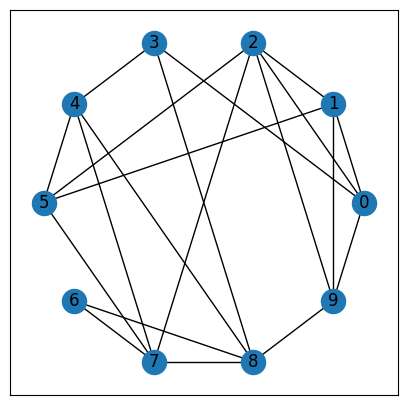

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
 
G = nx.watts_strogatz_graph(n = 10, k = 4, p = 0.5)
pos = nx.circular_layout(G)
 
plt.figure(figsize = (5, 5))
nx.draw_networkx(G, pos)

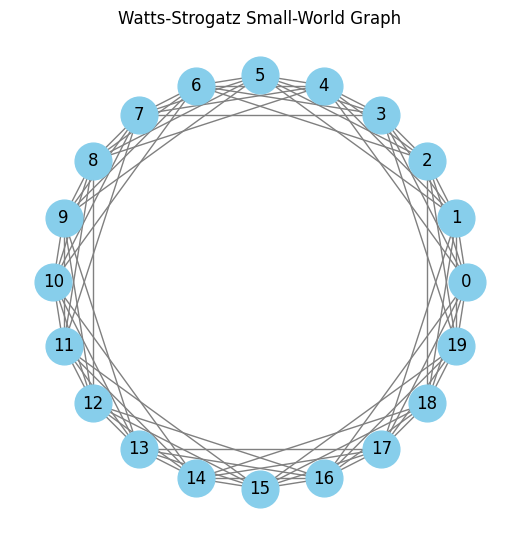

In [2]:
# from 

n = 20  # Number of nodes
k = 9   # Each node is connected to k nearest neighbors in ring topology
p = 0.0 # The probability of rewiring each edge

# Create a Watts-Strogatz small-world graph
G = nx.watts_strogatz_graph(n, k, p, seed=1)

# Draw the graph
plt.figure(figsize=(5, 5))
pos = nx.circular_layout(G)
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=700, edge_color='gray')
plt.title("Watts-Strogatz Small-World Graph")
plt.show()

In [10]:
G = nx.grid_2d_graph(7, 7, periodic=False)
# G.remove_nodes_from(tam.grid.empties)
G_raw = G.copy()
grid_pos = dict((n, n) for n in G.nodes()) 

def second_order_neighbors(G, node):
    return set(x for n in G.neighbors(node) for x in G.neighbors(n))-{node}

new_edges = []
for i,node in enumerate(G.nodes):
    scnd_neighbors = second_order_neighbors(G, node)
    edges_to_neighbors = [(node,n) for n in scnd_neighbors]
    new_edges.append(edges_to_neighbors)

for edge in new_edges:
    G.add_edges_from(edge)



In [11]:
# fig, axes = plt.subplots(1,2, figsize=(16,9))

# circ_pos = nx.circular_layout(G)
# nx.draw(G_raw, grid_pos, with_labels=True, ax=axes[0])
# nx.draw(G, circ_pos, with_labels=True, ax=axes[1])


In [12]:
import numpy as np
import random


def watts_strogatz_from_grid(G, p):
    # Create a copy of the grid graph to rewire
    H = G.copy()
    
    # List of all edges in the graph
    edges = list(H.edges())
    
    # Rewire each edge with probability p
    for edge in edges:
        if random.random() < p:
            u, v = edge
            # Remove the original edge
            H.remove_edge(u, v)
            
            # Find a new node to connect to u
            viable_nodes = set(G.nodes())- {u,v}
            new_v = random.choice(list(viable_nodes))
            
            # Add the new edge
            H.add_edge(u, new_v)
    
    return H

WS_h = watts_strogatz_from_grid(G, 0.3)


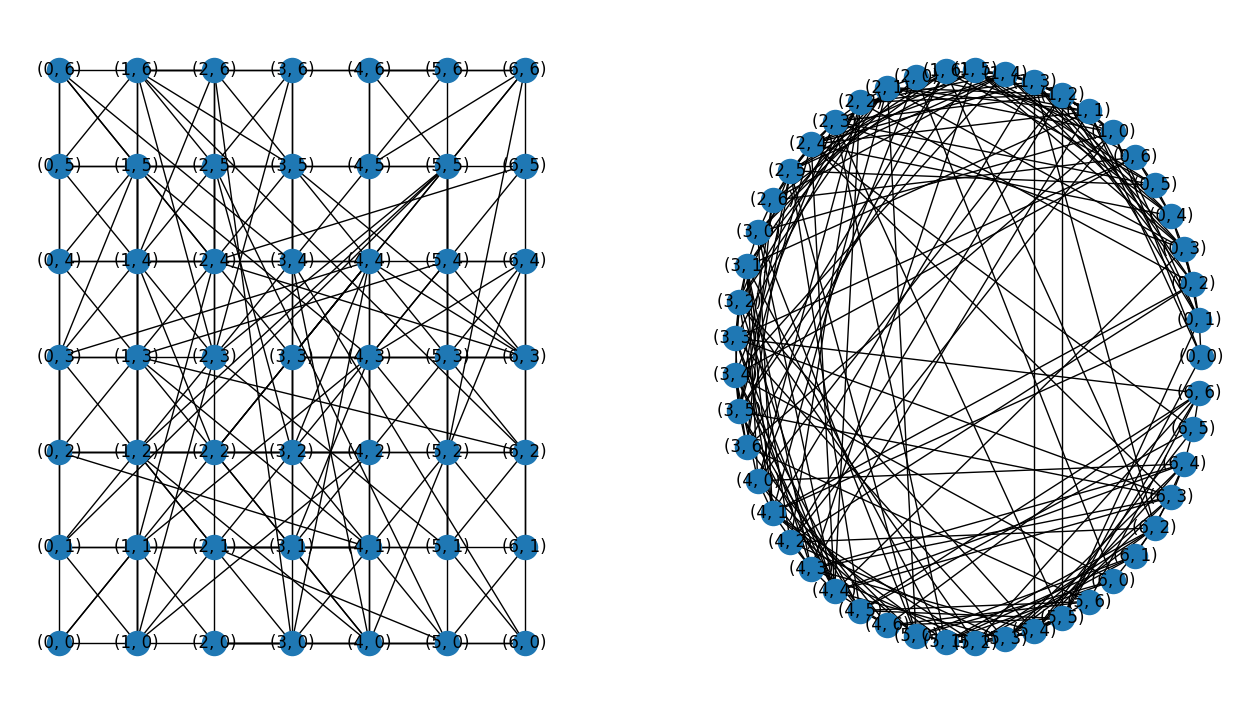

In [13]:



circ_pos = nx.circular_layout(WS_h)
grid_pos = dict((n, n) for n in WS_h.nodes()) 

fig, axes = plt.subplots(1,2, figsize=(16,9))
nx.draw(WS_h, circ_pos, with_labels=True, ax=axes[1])
nx.draw(WS_h, grid_pos, with_labels=True, ax=axes[0])



In [16]:
nx.omega(WS_h, niter=3,nrand=5)

0.1773124015205172

In [17]:
np.mean(list(dict(WS_h.degree).values()))

8.857142857142858

# Going forward
The transformation from grid to small world works.

It is now integrated in the model class.



In [1]:
from components.model import TechnologyAdoptionModel

tam = TechnologyAdoptionModel(50, "Ontario", n_segregation_steps=30)

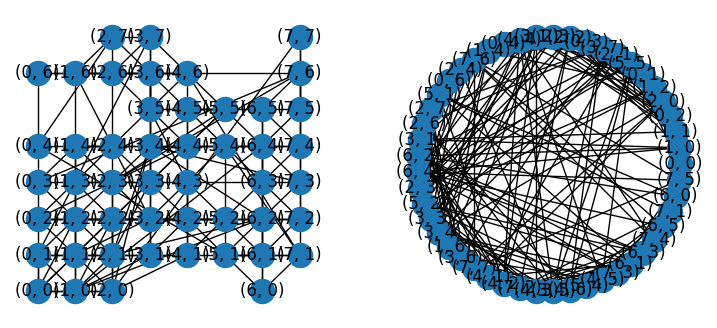

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
for agents, pos in tam.grid.coord_iter():
    if len(agents) < 1:
        continue

    for agent in agents:
        for p in agent.peers:
            G.add_edge(agent.pos, p.pos)
        
        G.add_node(agent.pos, income=agent.disposable_income * 4)

grid_pos = dict((n, n) for n in G.nodes()) 
circ_pos = nx.circular_layout(G)

fig, axes = plt.subplots(1,2, figsize=(9,4))
nx.draw(G, circ_pos, with_labels=True, ax=axes[1])
nx.draw(G, grid_pos, with_labels=True, ax=axes[0])




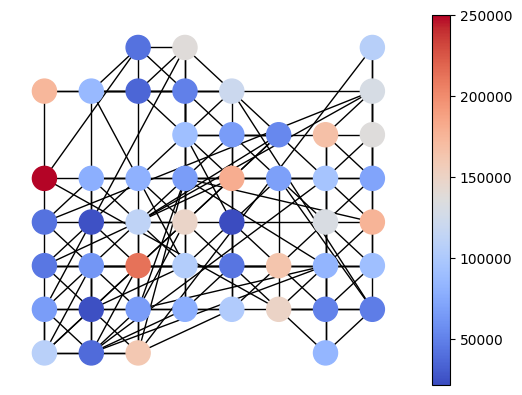

In [3]:
import matplotlib as mpl
values = dict(G.nodes(data=True)).values()
values = [x["income"] for x in values]
# values
low, *_, high = sorted(values,)

norm = mpl.colors.Normalize(vmin=low, vmax=high, clip=True)
mapper = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.coolwarm)
fig, ax = plt.subplots(1,1)
nx.draw(G, 
        pos=grid_pos,
        node_color=[mapper.to_rgba(i) 
                    for i in values], 
        ax=ax
        )
plt.colorbar(mapper, ax=ax)
plt.show()

In [4]:
import numpy as np
np.mean(list(dict(G.degree).values()))

7.836734693877551

In [5]:
nx.omega(G)

0.19653121123614492